In [1]:
%run ./resources/library.py

In [2]:
style_notebook()

# Notebook 3: Exploring TB and Socio-economic Indicators, Part 2

## Review Goals

Our goal for this TB exploration notebook is to construct a "gapminder" for TB data and a time series choropleth map. See figures below.

![Gapminder for TB](images/gapminder-for-tb.png)

**Figure 1**. Interactive Gapminder bubble chart for TB data

![Choropleth Timeseries for TB](images/choropleth-timeseries-tb.png)

**Figure 2**. Interactive choropleth map for TB data

## Steps in this notebook

Notebook 3
3. Merge, clean, explore dataframes
4. Generate plotly express visualizations

## STEP 1 (Review). Set up data exploration environment

To create visualizations, we will use Plotly Express. You can learn more about Plotly Express from:
1. [Plotly GitHub Site](https://github.com/plotly/plotly_express) (GitHub)
2. [Jupyter Notebook Example](https://www.plotly.express/)
3. Some articles written about it [here](https://medium.com/@plotlygraphs/introducing-plotly-express-808df010143d) and [here](https://towardsdatascience.com/plotly-express-the-good-the-bad-and-the-ugly-dc941649687c)

In [3]:
import plotly_express as px
px.__version__

'0.3.1'

We will also use our Swiss Army knife for data science, `pandas`.

In [4]:
import pandas as pd
pd.__version__

'0.24.2'

In [5]:
pd.set_option('max_colwidth', 150)
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)

**`missingno`**: Missing data visualization module for Python 

Read more about it here: https://github.com/ResidentMario/missingno

In [6]:
import missingno as mno
mno.__version__

'0.4.1'

In [7]:
%matplotlib inline

## STEP 2. Download and clean up data

Since we have created all the necessary dataframes in Notebook 2 and pickled these, we will just load the pickle files here. All data pickle files are found in the `outputs` folder.

In [9]:
tb_df2 = pd.read_pickle('outputs/tb_df2.pickle')
tb_dict_df = pd.read_pickle('outputs/tb_dict_df.pickle')
wb_gdp_df5 = pd.read_pickle('outputs/wb_gdp_df5.pickle')
wb_gdp_meta_df3 = pd.read_pickle('outputs/wb_gdp_meta_df3.pickle')
wb_ed_df4 = pd.read_pickle('outputs/wb_ed_df4.pickle')

## STEP 3. Clean, merge, explore data sets

### Merge #1: Merge WB data and metadata dataframes on `ISO_Alpha`

In [10]:
merged_df1 = pd.merge(wb_gdp_meta_df3, wb_gdp_df5, on=['ISO_Alpha'], how='inner')

merged_df1.head()

,ISO_Alpha,Region,IncomeGroup,Country_x,Country_y,Year,GDP-USD
0,ABW,Latin America & Caribbean,High income,Aruba,Aruba,1960,NaN
1,ABW,Latin America & Caribbean,High income,Aruba,Aruba,1961,NaN
2,ABW,Latin America & Caribbean,High income,Aruba,Aruba,1962,NaN
3,ABW,Latin America & Caribbean,High income,Aruba,Aruba,1963,NaN
4,ABW,Latin America & Caribbean,High income,Aruba,Aruba,1964,NaN


In [11]:
merged_df2 = merged_df1.rename(columns={'Country_x': 'Country'})

merged_df2.head()

,ISO_Alpha,Region,IncomeGroup,Country,Country_y,Year,GDP-USD
0,ABW,Latin America & Caribbean,High income,Aruba,Aruba,1960,NaN
1,ABW,Latin America & Caribbean,High income,Aruba,Aruba,1961,NaN
2,ABW,Latin America & Caribbean,High income,Aruba,Aruba,1962,NaN
3,ABW,Latin America & Caribbean,High income,Aruba,Aruba,1963,NaN
4,ABW,Latin America & Caribbean,High income,Aruba,Aruba,1964,NaN


In [12]:
import numpy as np

tb_nonmatch = np.setdiff1d(tb_df2.ISO_Alpha.unique(), merged_df2.ISO_Alpha.unique())

tb_nonmatch

array(['AIA', 'ANT', 'BES', 'COK', 'MSR', 'NIU', 'SCG', 'TKL', 'WLF'],
      dtype=object)

It seems we have a few countries that did not match from the two dataframes. Let's take a closer look, and view the country names.

In [13]:
for iso3 in tb_nonmatch:
    print(iso3, tb_df2.query("ISO_Alpha=='"+iso3+"'")['Country'].unique())

AIA ['Anguilla']
ANT ['Netherlands Antilles']
BES ['Bonaire, Saint Eustatius and Saba']
COK ['Cook Islands']
MSR ['Montserrat']
NIU ['Niue']
SCG ['Serbia & Montenegro']
TKL ['Tokelau']
WLF ['Wallis and Futuna Islands']


Do you know where these countries are?

### Merge #2: Merge TB data with WB data

In [14]:
merged_df3 = pd.merge(merged_df2, tb_df2, on=['ISO_Alpha', 'Year'], how='inner')
merged_df4 = merged_df3.rename(columns={'Country_x': 'Country'})

merged_df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3719 entries, 0 to 3718
Data columns (total 52 columns):
ISO_Alpha                   3719 non-null object
Region                      3719 non-null object
IncomeGroup                 3719 non-null object
Country                     3719 non-null object
Country_y                   3719 non-null object
Year                        3719 non-null int64
GDP-USD                     3566 non-null float64
Country_y                   3719 non-null object
iso2                        3701 non-null object
iso_numeric                 3719 non-null int64
g_whoregion                 3719 non-null object
e_pop_num                   3719 non-null int64
e_inc_100k                  3719 non-null float64
e_inc_100k_lo               3719 non-null float64
e_inc_100k_hi               3719 non-null float64
e_inc_num                   3719 non-null int64
e_inc_num_lo                3719 non-null int64
e_inc_num_hi                3719 non-null int64
e_tbhiv_prct 

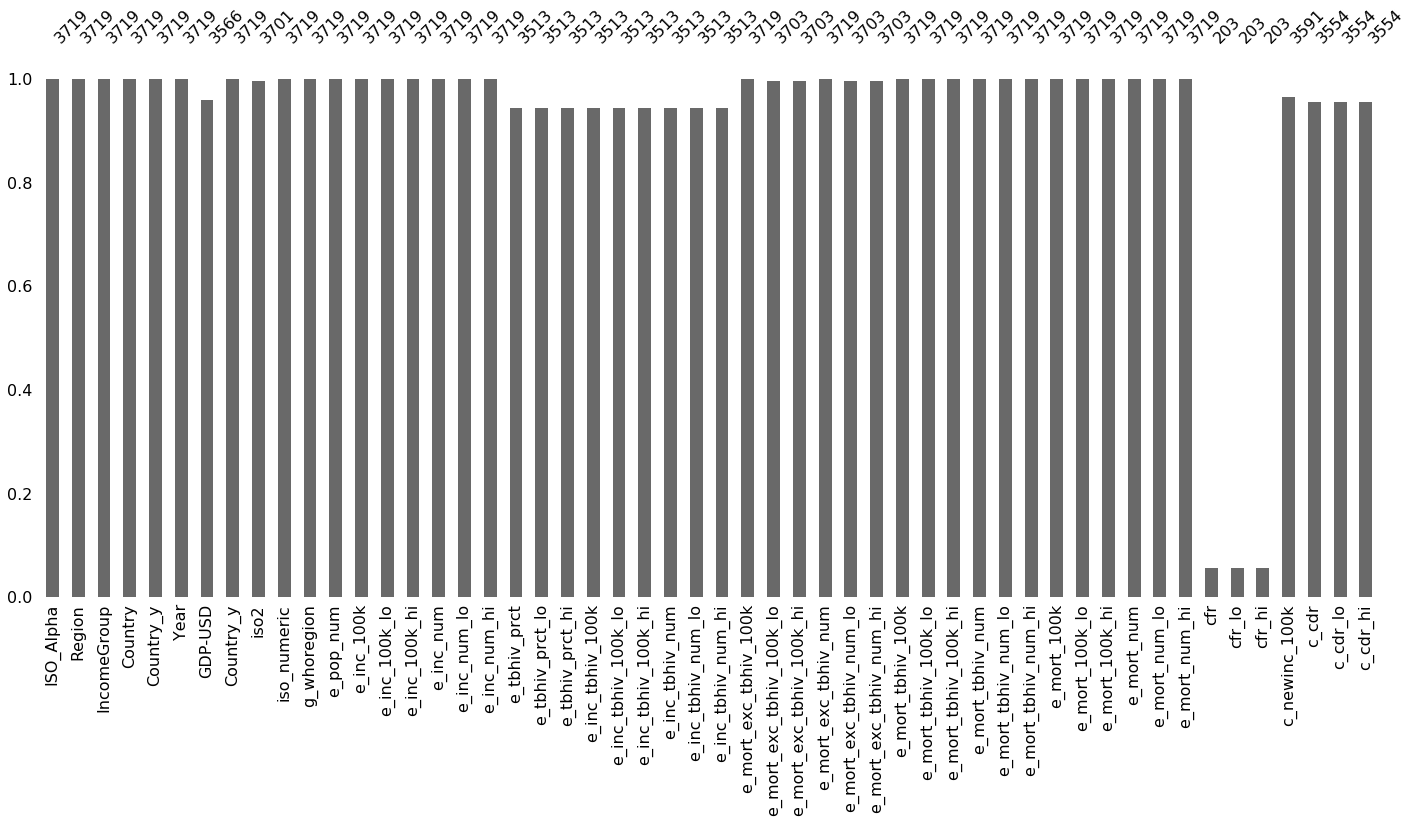

In [15]:
mno.bar(merged_df4)

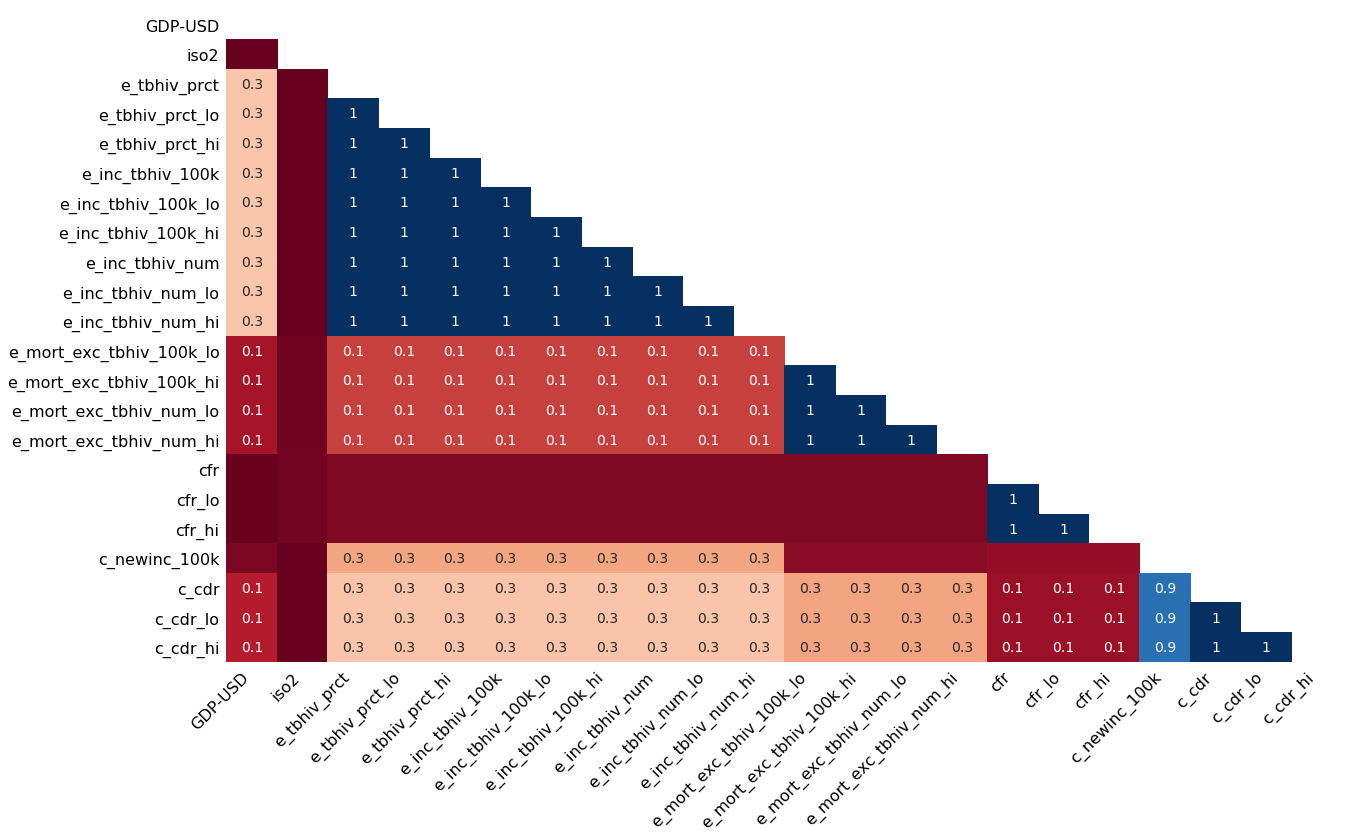

In [16]:
mno.heatmap(merged_df4)

### 2017 subset of second-merge dataframe

In [17]:
is_2017 = merged_df4['Year'] == 2017

In [18]:
merged_df4_2017 = merged_df4[is_2017]

In [19]:
merged_df4_2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209 entries, 17 to 3718
Data columns (total 52 columns):
ISO_Alpha                   209 non-null object
Region                      209 non-null object
IncomeGroup                 209 non-null object
Country                     209 non-null object
Country_y                   209 non-null object
Year                        209 non-null int64
GDP-USD                     198 non-null float64
Country_y                   209 non-null object
iso2                        208 non-null object
iso_numeric                 209 non-null int64
g_whoregion                 209 non-null object
e_pop_num                   209 non-null int64
e_inc_100k                  209 non-null float64
e_inc_100k_lo               209 non-null float64
e_inc_100k_hi               209 non-null float64
e_inc_num                   209 non-null int64
e_inc_num_lo                209 non-null int64
e_inc_num_hi                209 non-null int64
e_tbhiv_prct                197

### Pickle merged files

In [20]:
merged_df4_2017.to_pickle('outputs/merged_df4_2017.pickle')
merged_df4.to_pickle('outputs/merged_df4.pickle')

## You finished Notebook 3!

Please proceed to Notebook 4 to see the visualizations.